<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [24]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [25]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [26]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [27]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
# 지역
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [29]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

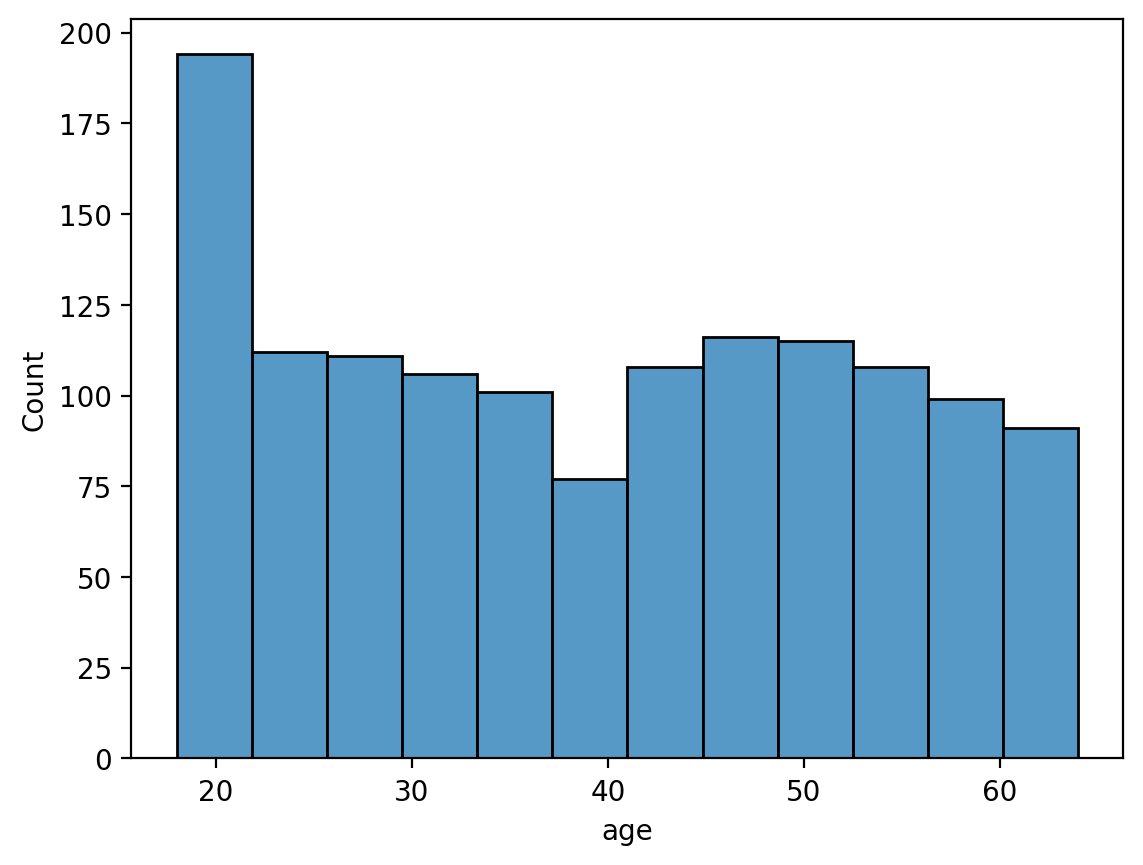

In [30]:
# age 분포 확인
sns.histplot(x=data['age'])
plt.show()

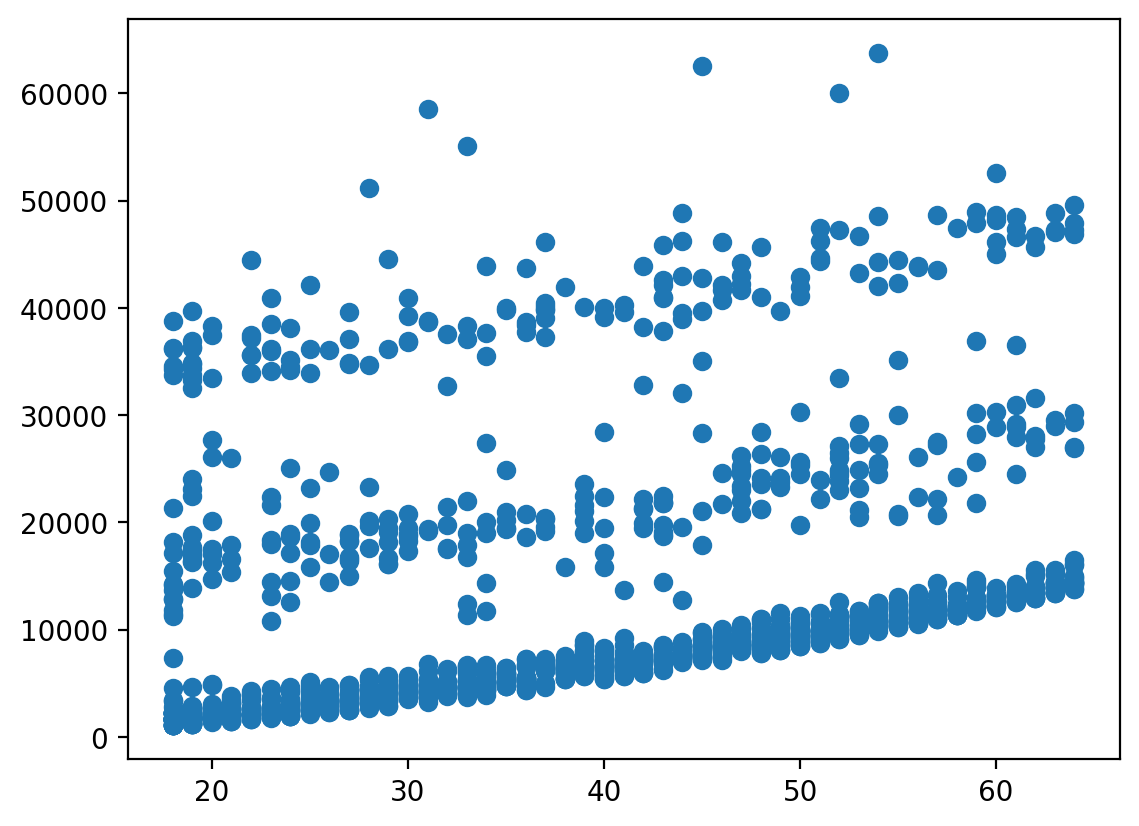

In [31]:
plt.scatter(x='age', y='charges',data=data)
plt.show()

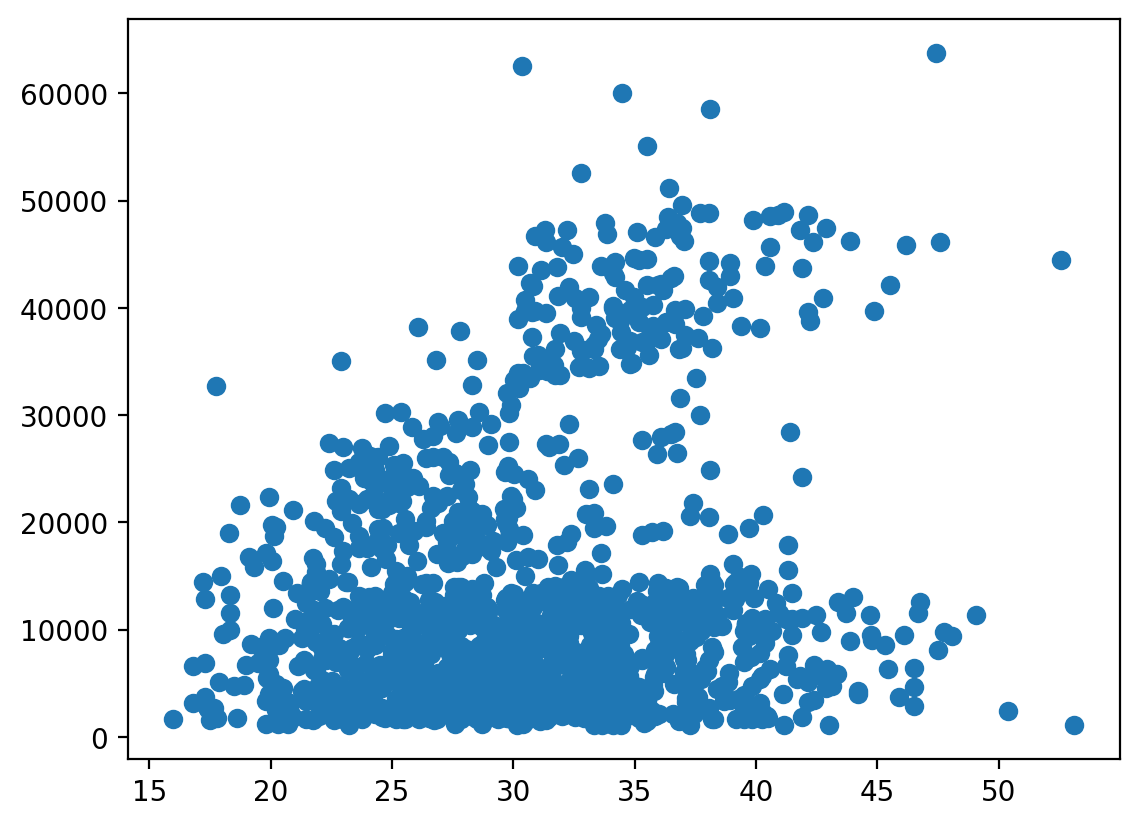

In [32]:
plt.scatter(x='bmi', y='charges',data=data)
plt.show()

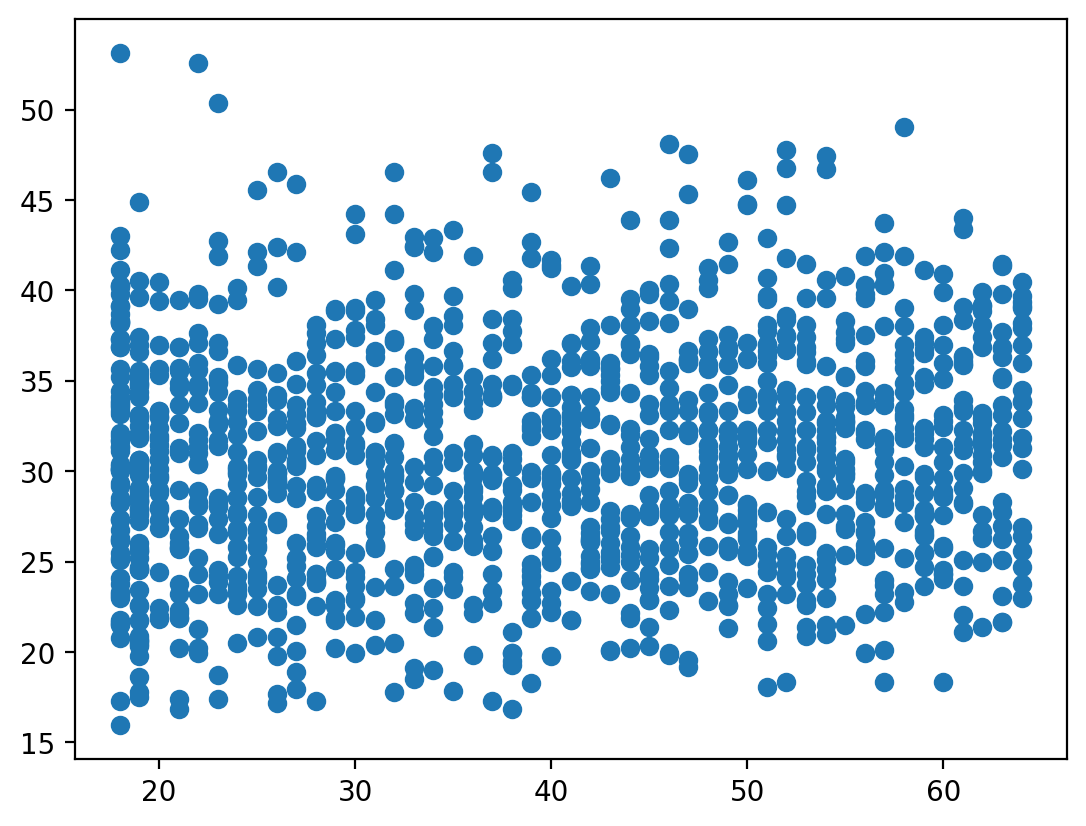

In [33]:
plt.scatter(x='age', y='bmi',data=data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

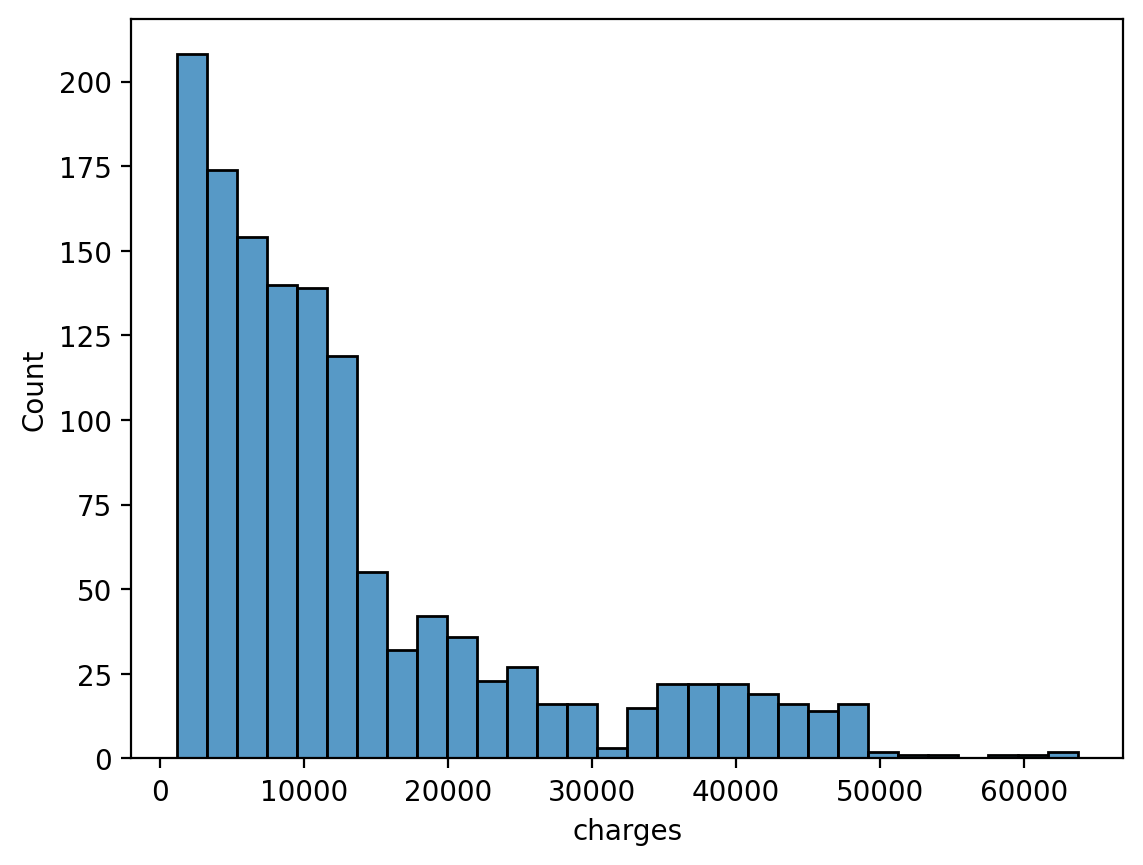

In [114]:
sns.histplot(data['charges'], bins=30)
plt.show

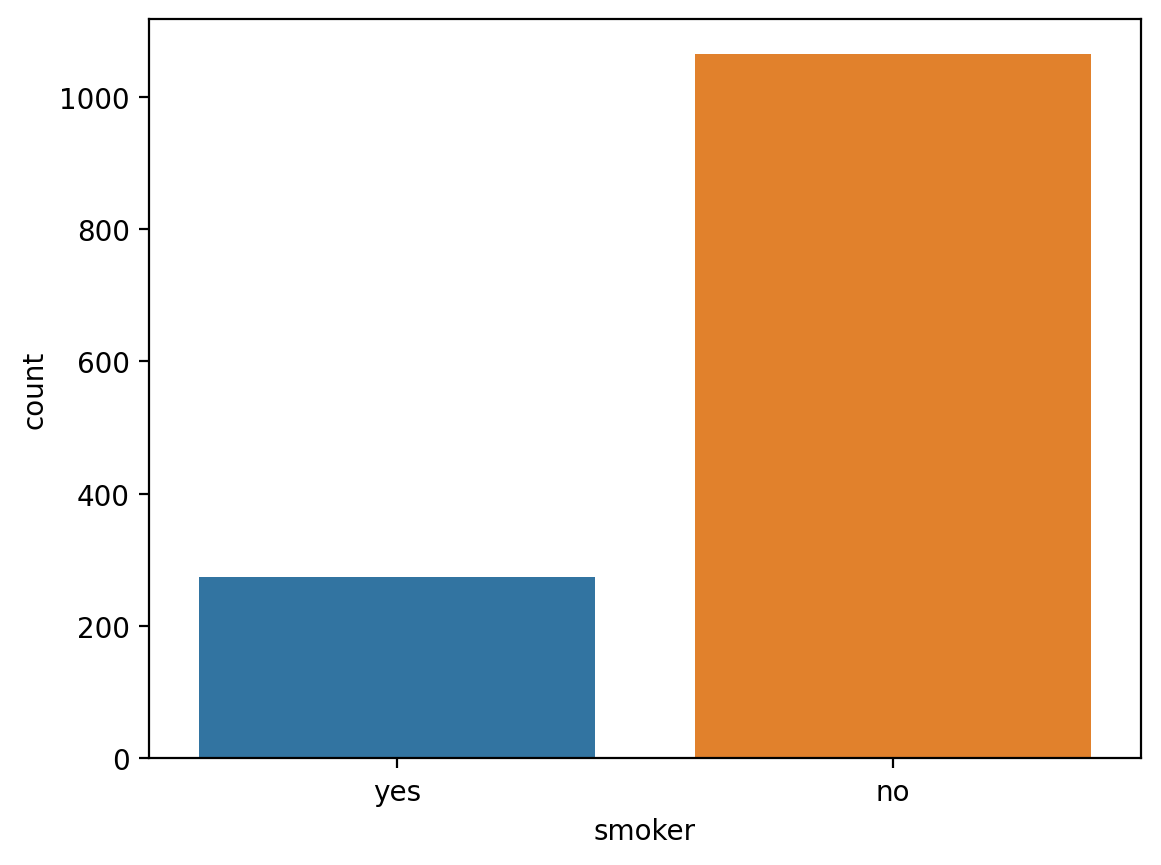

In [115]:
sns.countplot(x='smoker', data=data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

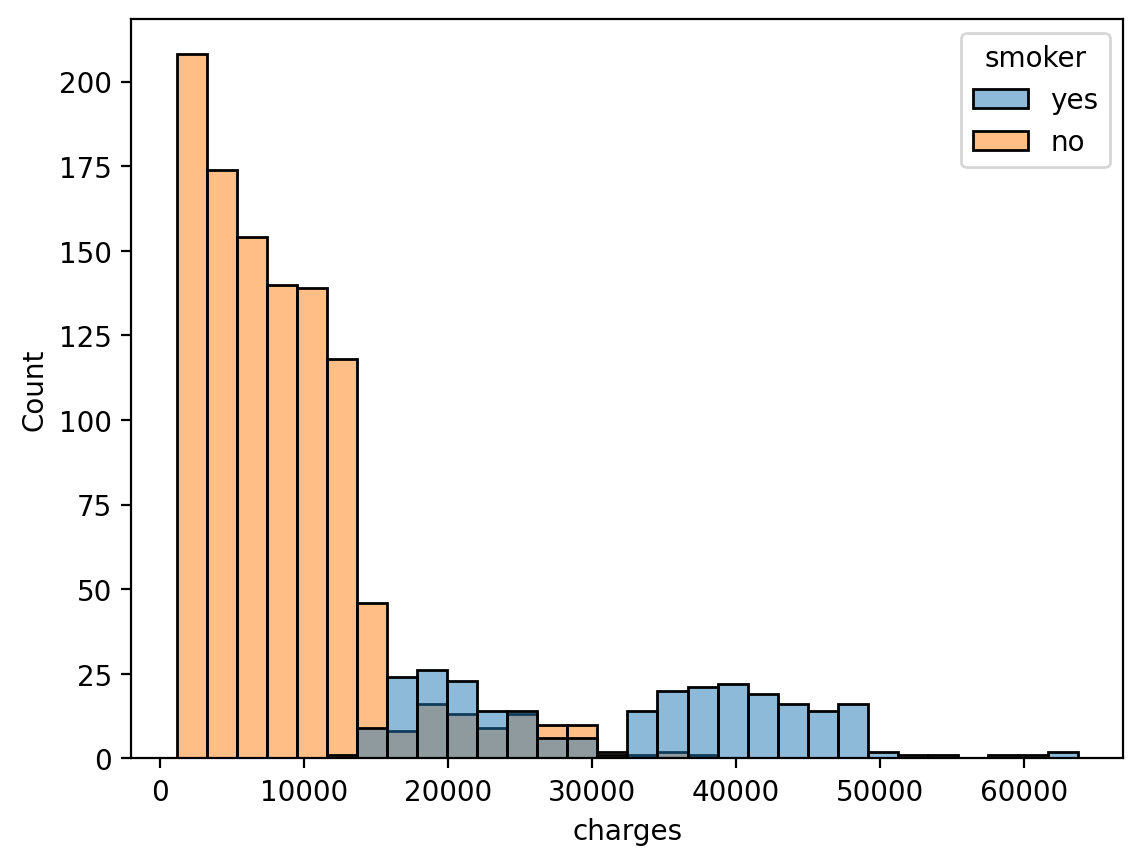

In [118]:
sns.histplot(x=data['charges'], hue=data['smoker'], bins=30)
plt.show

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [34]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 가변수화**

In [35]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)

# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 학습용, 평가용 데이터 분리**

In [36]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4) 정규화**

In [37]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)


# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [38]:
# xgboost 설치
# !pip install xgboost

In [39]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [80]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *


**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [81]:
# 선언하기
model_lr = LinearRegression()

In [82]:
# 성능예측
cv_score = cross_val_score(model_lr, x_train, y_train, cv=5)

In [83]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.70509828 0.783304   0.72862055 0.7145318  0.79360192]
0.7450313111847257


In [84]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()

**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [85]:
# 선언하기
model_knn = KNeighborsRegressor(n_neighbors=5)

In [86]:
# 성능예측
cv_score = cross_val_score(model_knn, x_train_s, y_train, cv=5)

In [87]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.71888638 0.74008066 0.69933224 0.71156668 0.77985485]
0.7299441631128959


In [88]:
# 결과수집
result['KNN'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [89]:
# 선언하기
model_dt = DecisionTreeRegressor(random_state=1)

In [90]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=5)

In [91]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.6608971  0.6792533  0.68937539 0.63748333 0.80967289]
0.6953363994799545


In [92]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [93]:
# 선언하기
model_rf = RandomForestRegressor(random_state=1)

In [94]:
# 성능예측
cv_score = cross_val_score(model_rf, x_train, y_train, cv=5)

In [95]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.79862997 0.85779001 0.81084703 0.79236068 0.87298443]
0.8265224227474246


In [96]:
# 결과수집
result['Random Forest'] = cv_score.mean()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [97]:
# 선언하기
model_xgb = XGBRegressor(random_state=1)

In [98]:
# 성능예측
cv_score = cross_val_score(model_xgb, x_train, y_train, cv=5)

In [99]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.74962787 0.84261962 0.79297753 0.75494891 0.86368838]
0.8007724609905447


In [100]:
# 결과수집
result['XGBoost'] = cv_score.mean()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [101]:
# 선언하기
model_lgbm = LGBMRegressor(random_state=1, verbose=-1)

In [102]:
# 성능예측
cv_score = cross_val_score(model_lgbm, x_train, y_train, cv=5)

In [103]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.77911639 0.86030389 0.82137793 0.79720611 0.88033543]
0.8276679486226464


In [104]:
# 결과수집
result['LGBM'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

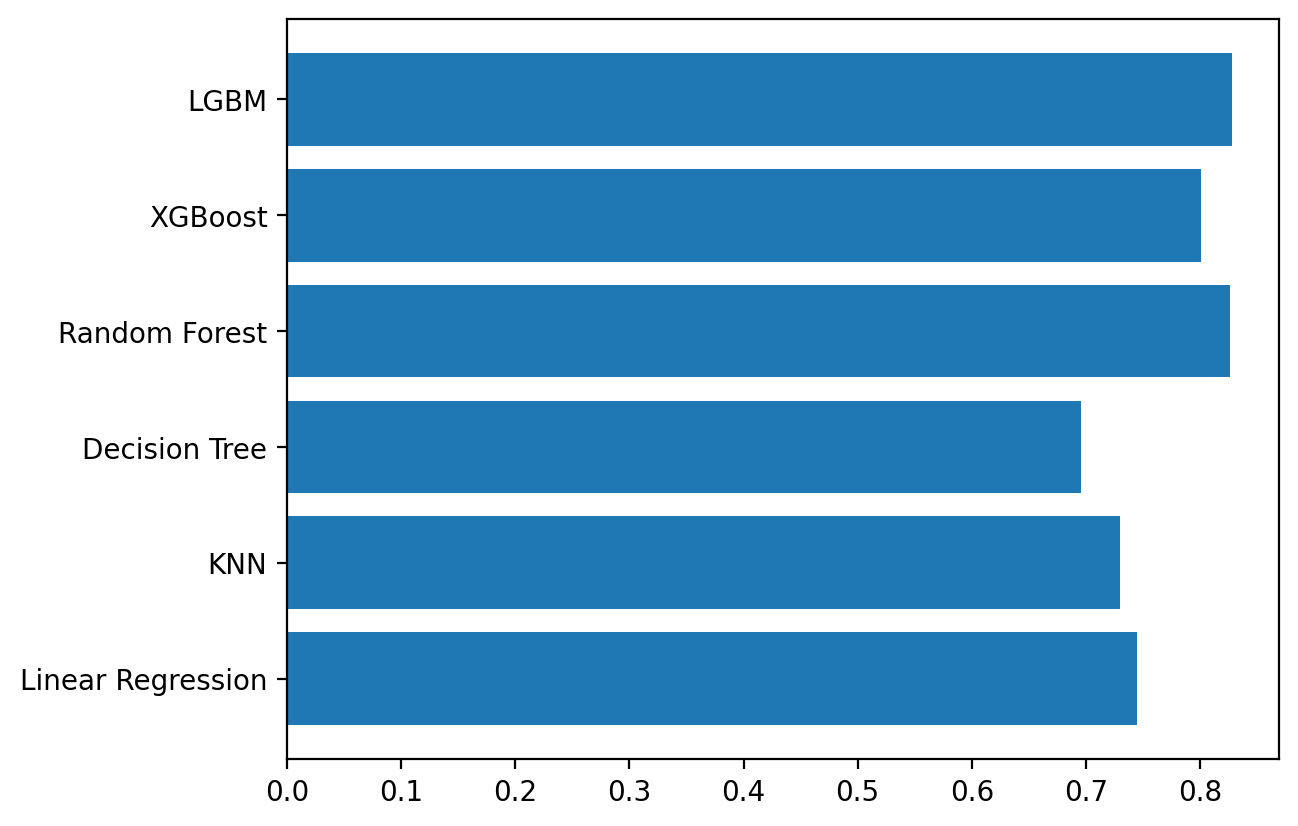

In [105]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

In [106]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.745
KNN 0.73
Decision Tree 0.695
Random Forest 0.827
XGBoost 0.801
LGBM 0.828


# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [107]:
# 기본 모델 선언
model_rf = RandomForestRegressor(random_state=1)

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'max_depth': range(1, 21)}

# 모델 선언
model = GridSearchCV(model_rf,
                     param,
                     cv=5
                    )


In [108]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 21)})

In [109]:
# 최적 파라미터, 예측 최고 성능
print('최적 파라미터: ', model.best_params_)
print('최고 성능: ', model.best_score_)

최적 파라미터:  {'max_depth': 4}
최고 성능:  0.8519332169168268


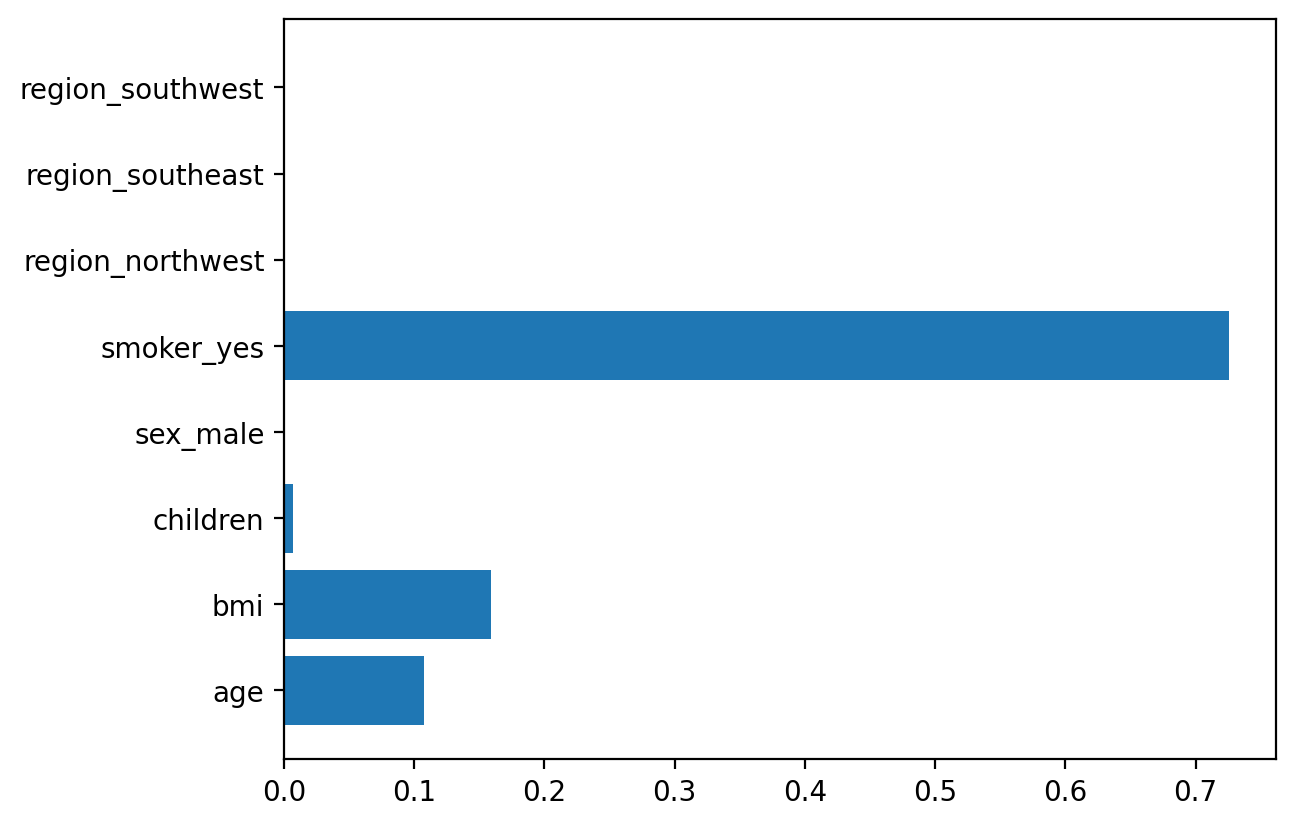

In [110]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()


# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [111]:
# 예측하기
y_pred = model.predict(x_test)

In [112]:
# 성능평가
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2-Score: ', r2_score(y_test, y_pred))

MAE:  2493.156835384944
R2-Score:  0.8560482679256518
